In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [88]:
cd/content/sample_data

/content/sample_data


In [89]:
pp1=pd.read_csv("/content/StaritaDiarios96_2019prec.csv.csv",index_col=16,parse_dates=True)

In [90]:
pp2=pd.read_csv("/content/datos Pza_pptacionDiaria_1996_2019.csv.csv",index_col=16,parse_dates=True)

In [91]:
pp3=pd.read_csv("/content/datos_PptDiaria_LaCabuya_1996_2019.csv.csv",index_col=16,parse_dates=True)

In [92]:
pp4=pd.read_csv("/content/datos_Ppt_diaria_Aguada_1996_2019.csv.csv",index_col=16,parse_dates=True)

In [93]:
ppt1=pd.DataFrame() # Genero un DataFrame vacio
ppt1['ppt1_Dat_Falt'] = pp1['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
ppt1.head()

,ppt1_Dat_Falt
Fecha,
1996-01-01,0.0
1996-01-02,0.0
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [94]:
ppt2=pd.DataFrame() # Genero un DataFrame vacio
ppt2['precip2'] = pp2['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
ppt2.head()

,precip2
Fecha,
1996-01-01,0.0
1996-01-02,0.0
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [95]:
ppt3=pd.DataFrame() # Genero un DataFrame vacio
ppt3['precip3'] = pp3['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
ppt3.head()

,precip3
Fecha,
1996-01-01,0.0
1996-01-02,0.5
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [96]:
ppt4=pd.DataFrame() # Genero un DataFrame vacio
ppt4['precip4'] = pp4['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
ppt4.head()

,precip4
Fecha,
1996-01-01,0.0
1996-01-02,0.0
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [97]:
# Se unen los datos de las estaciones en un solo DataFrame
precipStations=pd.concat([ppt1,ppt2,ppt3,ppt4], axis=1)
precipStations.index=pd.to_datetime(merged.index)# si se requiere convertir el indice a fecha
precipStations

,ppt1_Dat_Falt,precip2,precip3,precip4
Fecha,,,,
1996-01-01,0.0,0.0,0.0,0.0
1996-01-02,0.0,0.0,0.5,0.0
1996-01-03,0.0,0.0,0.0,0.0
1996-01-04,0.0,0.0,0.0,0.0
1996-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...
2019-12-27,0.0,0.0,0.0,2.0
2019-12-28,0.0,0.0,0.0,3.0
2019-12-29,3.7,5.0,12.0,0.0


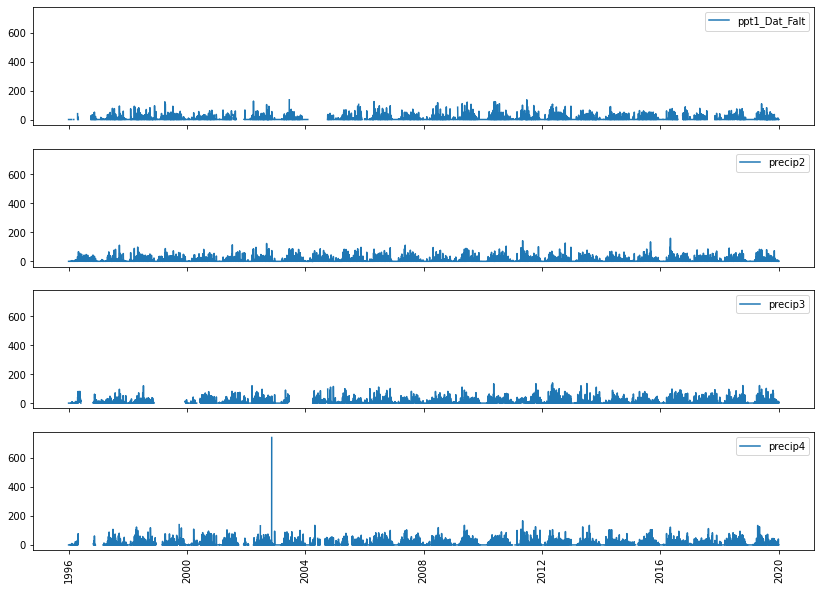

In [98]:
fig,axs=plt.subplots(4,1,figsize=(14,10),sharex=True, sharey=True)
axs[0].plot(precipStations.index, precipStations['ppt1_Dat_Falt'],label='ppt1_Dat_Falt')
axs[0].legend()
axs[1].plot(precipStations.index, precipStations['precip2'],label='precip2')
axs[1].legend()
axs[2].plot(precipStations.index, precipStations['precip3'],label='precip3')
axs[2].legend()
axs[3].plot(precipStations.index, precipStations['precip4'],label='precip4')
axs[3].legend()
plt.xticks(rotation='vertical')
plt.show()

In [99]:
#Se filtran los datos donde para las diferentes estaciones no esten vacios
PrecipNotNan=precipStations.dropna()
PrecipNotNan


,ppt1_Dat_Falt,precip2,precip3,precip4
Fecha,,,,
1996-01-01,0.0,0.0,0.0,0.0
1996-01-02,0.0,0.0,0.5,0.0
1996-01-03,0.0,0.0,0.0,0.0
1996-01-04,0.0,0.0,0.0,0.0
1996-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...
2019-12-27,0.0,0.0,0.0,2.0
2019-12-28,0.0,0.0,0.0,3.0
2019-12-29,3.7,5.0,12.0,0.0


In [100]:
PrecipNotNan.describe()

,ppt1_Dat_Falt,precip2,precip3,precip4
count,6994.000000,6994.000000,6994.000000,6994.000000
mean,4.999800,5.431084,7.873220,7.257092
std,13.503567,13.248322,15.046632,18.167323
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.600000,0.000000
75%,2.000000,3.600000,9.800000,6.000000
max,136.000000,158.800000,139.500000,741.000000


In [101]:
# Generar las variables de entrenamiento, la entrada y el destino
xTrain=PrecipNotNan[['precip2','precip3','precip4']]
yTrain=PrecipNotNan[['ppt1_Dat_Falt']].values.flatten()
yTrain #Es un array


array([0. , 0. , 0. , ..., 3.7, 0. , 0. ])

In [102]:
xTrain

,precip2,precip3,precip4
Fecha,,,
1996-01-01,0.0,0.0,0.0
1996-01-02,0.0,0.5,0.0
1996-01-03,0.0,0.0,0.0
1996-01-04,0.0,0.0,0.0
1996-01-05,0.0,0.0,0.0
...,...,...,...
2019-12-27,0.0,0.0,2.0
2019-12-28,0.0,0.0,3.0
2019-12-29,5.0,12.0,0.0


In [103]:
#En una red neural se le deben dar valores que van desde -1 a 1 porque el promedio debe ser 0 y la desviacion estandar 1, eso lo hace el StandardScaler
scaler=StandardScaler().fit(xTrain)
xTrainScaled=scaler.transform(xTrain)
xTrainScaled

array([[-0.40997435, -0.52329203, -0.39948706],
       [-0.40997435, -0.49005963, -0.39948706],
       [-0.40997435, -0.52329203, -0.39948706],
       ...,
       [-0.03254107,  0.27428564, -0.39948706],
       [-0.40997435, -0.52329203, -0.39948706],
       [-0.40997435, -0.51664555, -0.39948706]])

In [104]:
xTrainScaled.mean() # Es un valor muy cercano a cero

-2.0318636996285394e-17

In [105]:
xTrainScaled.std() # Es 1

1.0

In [106]:
xTrainScaled.min()

-0.5232920276917877

In [107]:
xTrainScaled.max()

40.39094567371117

In [108]:
regr=MLPRegressor(random_state=1, max_iter=5000).fit(xTrainScaled,yTrain)
regr

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [109]:
xTest=precipStations[['precip2','precip3', 'precip4']].dropna()
xTestScaled=scaler.transform(xTest)
print(xTest.describe())
print(xTestScaled[:10])

           precip2      precip3      precip4
count  7402.000000  7402.000000  7402.000000
mean      5.454175     7.954566     7.267455
std      13.272047    15.175600    18.083154
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.600000     0.000000
75%       3.600000     9.900000     6.100000
max     158.800000   139.500000   741.000000
[[-0.40997435 -0.52329203 -0.39948706]
 [-0.40997435 -0.49005963 -0.39948706]
 [-0.40997435 -0.52329203 -0.39948706]
 [-0.40997435 -0.52329203 -0.39948706]
 [-0.40997435 -0.52329203 -0.39948706]
 [-0.40997435 -0.52329203 -0.39948706]
 [-0.40997435 -0.52329203 -0.39948706]
 [-0.40997435 -0.52329203 -0.39948706]
 [-0.40997435 -0.52329203 -0.39948706]
 [-0.40997435 -0.52329203 -0.39948706]]


In [110]:
# Hacer la prediccion, valores predichos sobre los valores que existen
yPredict=regr.predict(xTestScaled)
yPredict

array([0.43090051, 0.50529335, 0.43090051, ..., 6.54822338, 0.43090051,
       0.44577908])

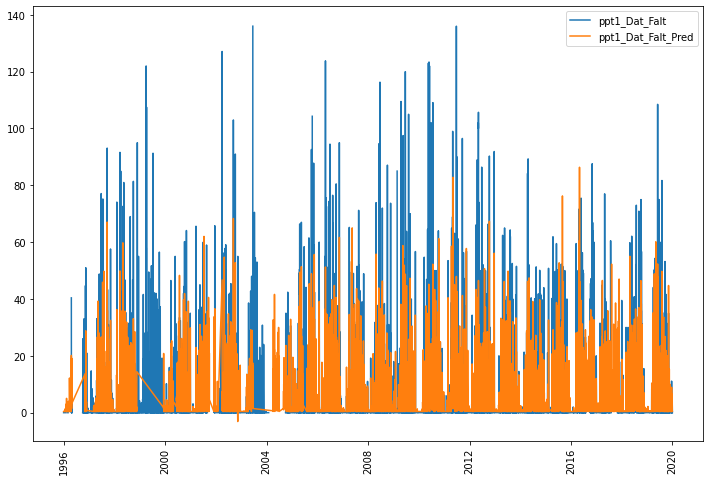

In [111]:
# como tambien se tenian valores, se representan los valores con los predecidos y se reemplazan donde no tenemos con los predecidos
fig,ax=plt.subplots(figsize=(12,8), sharex=True, sharey=True)
ax.plot(precipStations.index, precipStations['ppt1_Dat_Falt'], label='ppt1_Dat_Falt')
ax.plot(xTest.index, yPredict, label='ppt1_Dat_Falt_Pred')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [124]:
# se hace una iteracion, donde si los datos de la estacion con datos faltantes esta vacia, se rellenan con los datos
# ~ alt 126 es la negacion
precipStations['Est1Completada']=0
for index, row in precipStations.iterrows():
  if np.isnan(row['ppt1_Dat_Falt']) and ~np.isnan(row['precip2']) and ~np.isnan(row['precip3']) and ~np.isnan(row['precip4']):
     rowScaled=scaler.transform([[row['precip2'], row['precip3'],row['precip4']]])
     precipStations.loc[index,['Est1Completada']]=regr.predict(rowScaled)
  elif ~np.isnan(row['ppt1_Dat_Falt']):
     precipStations.loc[index,['Est1Completada']]=row['ppt1_Dat_Falt']
  else:
     precipStations.loc[index,['Est1Completada']]=np.nan
precipStations.head()

,ppt1_Dat_Falt,precip2,precip3,precip4,Est1Completada
Fecha,,,,,
1996-01-01,0.0,0.0,0.0,0.0,0.0
1996-01-02,0.0,0.0,0.5,0.0,0.0
1996-01-03,0.0,0.0,0.0,0.0,0.0
1996-01-04,0.0,0.0,0.0,0.0,0.0
1996-01-05,0.0,0.0,0.0,0.0,0.0


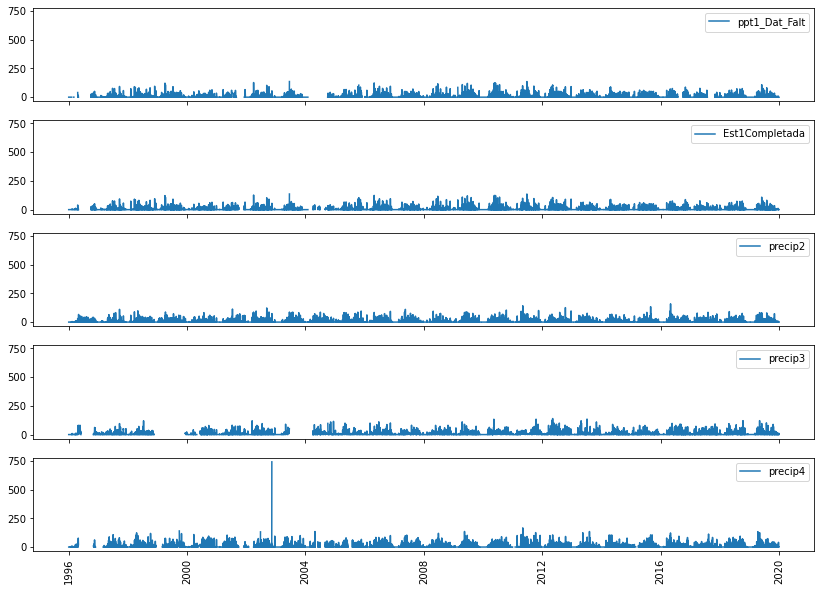

In [126]:
fig,axs=plt.subplots(5,1,figsize=(14,10),sharex=True, sharey=True)
axs[0].plot(precipStations.index, precipStations['ppt1_Dat_Falt'],label='ppt1_Dat_Falt')
axs[0].legend()
axs[1].plot(precipStations.index, precipStations['Est1Completada'],label='Est1Completada')
axs[1].legend()
axs[2].plot(precipStations.index, precipStations['precip2'],label='precip2')
axs[2].legend()
axs[3].plot(precipStations.index, precipStations['precip3'],label='precip3')
axs[3].legend()
axs[4].plot(precipStations.index, precipStations['precip4'],label='precip4')
axs[4].legend()
plt.xticks(rotation='vertical')
plt.show()

In [128]:
precipStations.to_excel('/content/sample_data/RellenoConRedesNeuronalesStaRita.xls')